# Assignment1: PH549- Physics of Biological systems
H R Sai Sumedh, 180070024, EE DD CSP 4th year

In [1]:
import numpy as np, matplotlib.pyplot as plt, math, time

Define constants

In [2]:
um = 1# micro metre as unit
R = 10*um
r = 1*um # radius of FRAP ROI
D = 1*(um)**2 # 1 um^2/s
# D = 2*(um)**2
Np=5000
# Np = 10000 # number of proteins present 

Diffusion in 2-D

In [3]:
dt = 1e-3
# dt = 0.5e-3
T=3000
# T = 6000
t = np.linspace(0, T*dt, T)
N = 200 #100 points in (-R, R)
N_sim = 250 # total simulation area
dx = 2*R/N_sim #resolution along x
dy = dx # resolution along y
C = np.zeros((N_sim, N_sim, T)) # concentration matrix for all time

In [4]:
# define laplacian matrix (for d/dx2) Lap_x*column vector f with values along x gives d2f/dx2
Lap_x = (-2*np.diag(np.ones((N_sim, )), 0) + np.diag(np.ones((N_sim-1, )), 1) + np.diag(np.ones((N_sim-1, )), -1) )/(dx**2)

Lap_x[0,0] = 0
Lap_x[0,1] = 0
Lap_x[1,0] = 0
Lap_x[-1,-1] = 0
Lap_x[-1,-2] = 0
Lap_x[-2,-1] = 0

In [5]:
def circle(N_total, N_diam):
    '''
    N_total: total points 
    N_diam : number of points in desired diameter (of circle at centre) 
    returns a 2D array with 1s inside a circle with diameter N_diam and 0s outside
    '''
    cell_mask = np.zeros((N_total,N_total))
    for i in range(N_diam):
        nonzero_indices = np.arange(math.ceil(N_total/2 - np.sqrt(i*(N_diam-i))),math.floor(N_total/2+ np.sqrt(i*(N_diam-i))),1)
        try:
            cell_mask[math.ceil((N_total-N_diam)/2)+i, nonzero_indices] = 1
        except IndexError:
            print(f"Error in :\n{i}, {nonzero_indices}")
    return cell_mask

In [6]:
cell_mask = circle(N_sim, N)
roi_mask = circle(N_sim, math.floor(N*r/R))

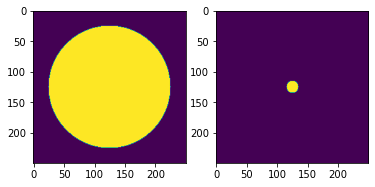

In [7]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(cell_mask)
ax[1].imshow(roi_mask)

Initial conditions: C0

Text(0.5, 1.0, 'Initial Concentration')

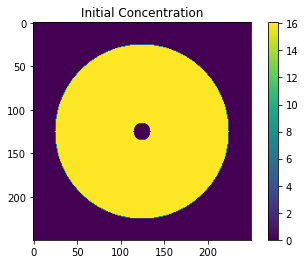

In [8]:
c_init = (Np/(np.pi*(R**2-r**2)))
C0 = c_init*(cell_mask- roi_mask)
plt.imshow(C0)
plt.colorbar()
plt.title('Initial Concentration')


In [9]:
C[:,:,0]= C0

In [10]:
N_roi = np.zeros((T,)) # number of proteins in ROI

In [11]:
tic = time.time()
for tk in range(T-1):
    C[:,:,tk+1] = C[:,:,tk] + dt*D*circle(N_sim, N-2)*( np.dot(Lap_x, C[:,:,tk].T).T + np.dot(Lap_x, C[:,:,tk]))
    C[:,:,tk+1] = C[:,:,tk+1]*np.sum(C[:,:,0])/np.sum(C[:,:,tk+1]) # normalize to ensure constant number of proteins
    N_roi[tk+1] = np.pi*(r**2)*np.sum((C[:,:,tk+1]*roi_mask))/np.sum(roi_mask)
print(f"time taken: {time.time()-tic}s")

time taken: 47.37151527404785s


In [12]:
N_roi_ss = Np*(r/R)**2

In [13]:
t_half_index = np.min(np.argwhere(N_roi>=N_roi_ss/2))
t_half = t[t_half_index]

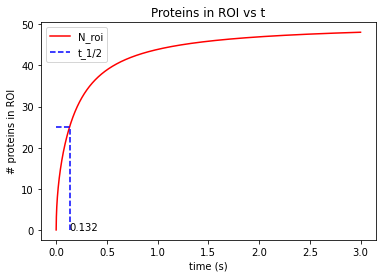

In [14]:
plt.plot(t, N_roi, 'r')
plt.plot([0, t_half], [N_roi_ss/2, N_roi_ss/2], 'b--')
plt.plot([t_half, t_half], [0, N_roi_ss/2], 'b--')
plt.legend(['N_roi', 't_1/2'])
plt.xticks([0.5*i for i in range(0,7)])
plt.xlabel('time (s)')
plt.ylabel('# proteins in ROI')
plt.title("Proteins in ROI vs t")
plt.annotate(str(round(t_half,3)), (t_half, 0))
plt.show()

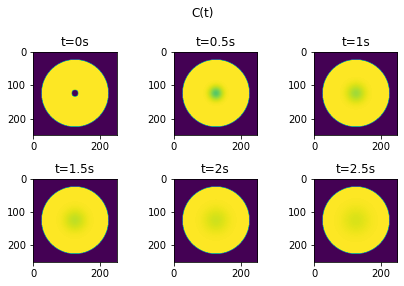

In [23]:
fig, ax = plt.subplots(2, 3, )
ax[0,0].imshow(C[:,:,0])
ax[0,0].set_title('t=0s')
ax[0,1].imshow(C[:,:,500])
ax[0,1].set_title('t=0.5s')
ax[0,2].imshow(C[:,:,1000])
ax[0,2].set_title('t=1s')
ax[1,0].imshow(C[:,:,1500])
ax[1,0].set_title('t=1.5s')
ax[1,1].imshow(C[:,:,2000])
ax[1,1].set_title('t=2s')
ax[1,2].imshow(C[:,:,2500])
ax[1,2].set_title('t=2.5s')
fig.suptitle("C(t)")
fig.tight_layout()